In [1]:
import numpy as np
from PIL import Image, ImageDraw
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

### A dataset with either one or two rings in the same image (and an associated label file!)

In [ ]:
def create_ring(image_size, center, radius, thickness, deformation=0):
    img = Image.new('L', (image_size, image_size), color=0)
    draw = ImageDraw.Draw(img)
    
    for angle in range(360):
        r = radius + random.uniform(-deformation, deformation)
        x = center[0] + r * np.cos(np.radians(angle))
        y = center[1] + r * np.sin(np.radians(angle))
        draw.ellipse([x-thickness/2, y-thickness/2, x+thickness/2, y+thickness/2], fill=255)
    
    return np.array(img)

def generate_N_ring_dataset(num_images, image_size=28, save_dir='N_ring_dataset'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    labels = []
    
    for i in range(num_images):
        # Note that you can have more rings in the same image if you like by changing the numbes below!
        num_rings = random.choice([1, 2])
        img = np.zeros((image_size, image_size), dtype=np.uint8)
        
        for _ in range(num_rings):
            center = (random.randint(5, image_size-5), random.randint(5, image_size-5))
            radius = random.randint(3, min(center[0], center[1], image_size-center[0], image_size-center[1])-2)
            thickness = random.uniform(0.2, 1)
            deformation = random.uniform(0, 1)
            
            ring = create_ring(image_size, center, radius, thickness, deformation)
            img = np.maximum(img, ring)
        
        img_pil = Image.fromarray(img)
        img_pil.save(f'{save_dir}/ring_image_{i}.png')
        labels.append(num_rings)
    
    with open(f'{save_dir}/labels.txt', 'w') as f:
        for label in labels:
            f.write(f'{label}\n')

In [ ]:
# Generate 10000 images
generate_N_ring_dataset(10000)
print("Dataset generated successfully!")

In [7]:
def load_N_ring_dataset(directory):
    images = []
    labels = []
    
    # Read labels first
    with open(os.path.join(directory, 'labels.txt'), 'r') as f:
        labels = [int(line.strip()) - 1 for line in f]  # Subtract 1 from each label
    
    # Load images in the correct order
    for i in range(len(labels)):
        filename = f'ring_image_{i}.png'
        img_path = os.path.join(directory, filename)
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('L')
            img_array = np.array(img).reshape(-1).astype('float32') / 255
            images.append(img_array)
        else:
            print(f"Warning: Image {filename} not found. Skipping.")
    
    # Ensure we have the same number of images and labels
    if len(images) != len(labels):
        print(f"Warning: Number of images ({len(images)}) does not match number of labels ({len(labels)})")
    
    return np.array(images), np.array(labels)

In [4]:
import matplotlib.pyplot as plt

def plot_dataset_samples(images, labels, dataset_name, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(f"{dataset_name} Dataset Samples")
    plt.show()

def visualize_datasets(ring_data):
    (x_ring, y_ring) = ring_data

    # Visualize Ring dataset samples
    ring_indices = np.random.choice(len(x_ring), 5, replace=False)
    plot_dataset_samples(x_ring[ring_indices], y_ring[ring_indices], "Ring")

In [8]:
ring_data = load_N_ring_dataset('N_ring_dataset')

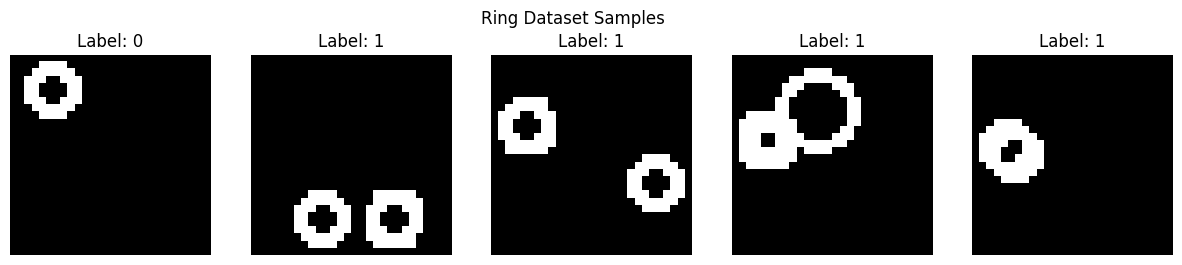

In [9]:
# Visualize datasets
visualize_datasets(ring_data)

### Following the MNIST example, can you classify this data into events with one ring and events with two rings?

### Can you used a non Neural-Network-based technique to do this classification?
HINT: Use PCA + SVM!

### Generate a new datasets with a larger number of rings 1,2,3,4...etc!
How does the performances change versus N?

### As a function of N, what is the distribution of clusters? Namely, how many groups of disconnected hits can you find?
HINT: Use DBSCAN algorithm to find the clusters!